# SINGLE DOCUMENT AUTOMATIC TEXT SUMMARIZATION EKSTRAKTIF BAHASA INDONESIA DENGAN METODE TF-IDF

#### Wahyu pebrianto

In [1]:
import re
from string import punctuation
import string
import pandas as pd
import os

### [1] INPUT DATASET OKEZONE.COM DARI [TAHAPAN PENGUMPULAN DATA DENGAN TEKNIK SCRAPING]

In [2]:
dframe=pd.read_json('data_skripsi/data_penelitian2.json')
#pd.options.display.max_colwidth = 100
dframe
#df=str(dframe['deskripsi'][9])

,date,deskripsi,title
0,Senin 13 April 2020 17:42 WIB,[- Pemerintah Kabupaten (Pemkab) Karawang bere...,"Masuk Zona Merah Corona, Pemkab Karawang Bakal..."
1,Senin 13 April 2020 18:24 WIB,[ – Pemerintah Pusat telah merestui Kota Pekan...,Gubernur Riau Minta Daerah Dekat Pekanbaru Ter...
2,Senin 13 April 2020 18:34 WIB,[- Seorang wanita cantik berusia 19 tahun haru...,"Bawa Sabu 39 Kg, Kurir Cantik Ditangkap Polisi"
3,Senin 13 April 2020 18:24 WIB,[- Korea Selatan melaporkan sedikitnya 116 ora...,Korea Selatan Laporkan Peningkatan Kasus Pasie...
4,Senin 13 April 2020 18:38 WIB,[– Sepuluh remaja yang diduga bagian dari kelo...,"Lakukan Vandalisme di Malang, 10 Remaja Diduga..."
5,Senin 13 April 2020 18:59 WIB,[- Pemimpin Korea Utara Kim Jong Un merombak K...,"Wabah Virus Corona, Kim Jong-un Rombak Komisi ..."
6,Senin 13 April 2020 18:49 WIB,[- Bijaklah bermedia sosial (medsos). Seorang ...,"Posting Status Hoaks Tentang Corona, Seorang I..."
7,Senin 13 April 2020 18:53 WIB,[– Kementerian Pendidikan dan Kebudayaan (Keme...,"Kembangkan Aplikasi Recon, Nadiem Makarim: Sat..."
8,Senin 13 April 2020 19:28 WIB,"[- Gubernur Jabar Ridwan Kamil, punya program ...","Pandemi Corona, Ridwan Kamil Minta Orang Mampu..."
9,Senin 13 April 2020 20:30 WIB,[– Seorang pendaki Gunung Buthak dilaporkan te...,"Keluar Jalur, Remaja Pendaki Gunung Buthak Hilang"


In [3]:
kalimat=str(dframe['deskripsi'][22])
#22,24,0,6,8,12,13,14,16,32
judul=str(dframe['title'][22])
print(judul)
print(kalimat)

 Polisi Gerebek Tempat Karaoke, Belasan Orang Diamankan   
['- Kota Bandung telah menerapkan pembatasan kegiatan untuk sementara waktu. Pada pelaksanaanya, beberapa pusat perbelanjaan dibatasi hingga penutupan tempat hiburan.\n\n', 'Namun, di tengah pemerintah tengah giat melakukan imbauan, salah satu tempat karaoke nekat beroperasi dan menggelar pesta miras. Polisi pun lakukan penggerebekan dan menutup, tempat karaoke bernama Retro Room yang beralamat di Jalan Jalan Gatot Subroto, Kecamatan Lengkong, Kota Bandung, tersebut.\n', '\n', ' ', '"Semalam kita gerebek dan langsung kita tutup serta kita amankan 16 orang mulai dari manajemen, pemandu lagu, hingga tamu karaoke tersebut," kata Kapolrestabes Bandung, Kombes Ulung Sampurna Jaya, saat ditemui di Mapolrestabes, Selasa (14/4/2020).\n\n', 'Beroperasinya karaoke tersebut, diketahui polisi setelah mendapat informasi dari masyarakat, yang menyebutkan kalau tempat karaoke itu, masih sering terlihat ada aktifitas.', '\xa0', '\n', 'Saat dil

# 2. PREPROCESSING

### 2.1 Casefolding

In [4]:
def text_lower(kalimat):#merubah huruf besar ke kecil
    lower_case = kalimat.lower()
    return lower_case

def hapus_angka(kalimat):#hapus angka
    remove_angka = re.sub(r"\d+", "", kalimat)
    return remove_angka

def hapus_karakter_kecuali(kalimat):
    remove_tags = re.sub(r'[^\w\s.-]','', kalimat)
    return remove_tags

def hapus_Tags(kalimat):#hapus tags html
    remove_tags = re.sub('<[^<]+?>', '', kalimat)
    return remove_tags

def hapus_line_break(kalimat):#hapus tags html
    remove_tags = re.sub(r"\\n","", kalimat, flags=re.I)
    return remove_tags

def hapus_huruf_tidak_jelas(kalimat):#hapus tags html
    remove_tags = re.sub(r"xa","", kalimat, flags=re.I)
    return remove_tags

def hapus_Tags(kalimat):#hapus tags html
    remove_tags = re.sub('<[^<]+?>', '', kalimat)
    return remove_tags
def hapus_karakter_awal(kalimat):#hapus tags html
    remove_tags = re.sub(r"^\W+","", kalimat, flags=re.I)
    return remove_tags

def hapus_spasi(kalimat):#hapus whitepace
    return " ".join(kalimat.split())

#hasil
def casefolding(kalimat):
    kalimat = text_lower(kalimat)
    kalimat = hapus_angka(kalimat)
    kalimat = hapus_line_break(kalimat)
    kalimat = hapus_huruf_tidak_jelas(kalimat)
    kalimat = hapus_karakter_awal(kalimat)
    #kalimat = hapus_tanda_baca(kalimat)
    kalimat = hapus_karakter_kecuali(kalimat)
    kalimat = hapus_spasi(kalimat)
    return kalimat
casefolding=casefolding(kalimat)
print(casefolding)
#df = pd.DataFrame()
#pd.options.display.max_colwidth = 700000
#df['Teks Awal'] = pd.Series(kalimat)
#df['Hasil Casefolding'] = pd.Series(casefolding)
#df

kota bandung telah menerapkan pembatasan kegiatan untuk sementara waktu. pada pelaksanaanya beberapa pusat perbelanjaan dibatasi hingga penutupan tempat hiburan. namun di tengah pemerintah tengah giat melakukan imbauan salah satu tempat karaoke nekat beroperasi dan menggelar pesta miras. polisi pun lakukan penggerebekan dan menutup tempat karaoke bernama retro room yang beralamat di jalan jalan gatot subroto kecamatan lengkong kota bandung tersebut. semalam kita gerebek dan langsung kita tutup serta kita amankan orang mulai dari manajemen pemandu lagu hingga tamu karaoke tersebut kata kapolrestabes bandung kombes ulung sampurna jaya saat ditemui di mapolrestabes selasa . beroperasinya karaoke tersebut diketahui polisi setelah mendapat informasi dari masyarakat yang menyebutkan kalau tempat karaoke itu masih sering terlihat ada aktifitas. saat dilakukan penggerebekan pihak manajemen mencoba mengelabui petugas dengan pura-pura tidak beroperasi. namun saat dilakukan pemeriksaan pada lanta

In [5]:
df = pd.DataFrame()
pd.options.display.max_colwidth = 30000
df['Teks Awal'] = pd.Series(kalimat)
df['Hasil Casefolding'] = pd.Series(casefolding)
df

,Teks Awal,Hasil Casefolding
0,"['- Kota Bandung telah menerapkan pembatasan kegiatan untuk sementara waktu. Pada pelaksanaanya, beberapa pusat perbelanjaan dibatasi hingga penutupan tempat hiburan.\n\n', 'Namun, di tengah pemerintah tengah giat melakukan imbauan, salah satu tempat karaoke nekat beroperasi dan menggelar pesta miras. Polisi pun lakukan penggerebekan dan menutup, tempat karaoke bernama Retro Room yang beralamat di Jalan Jalan Gatot Subroto, Kecamatan Lengkong, Kota Bandung, tersebut.\n', '\n', ' ', '""Semalam kita gerebek dan langsung kita tutup serta kita amankan 16 orang mulai dari manajemen, pemandu lagu, hingga tamu karaoke tersebut,"" kata Kapolrestabes Bandung, Kombes Ulung Sampurna Jaya, saat ditemui di Mapolrestabes, Selasa (14/4/2020).\n\n', 'Beroperasinya karaoke tersebut, diketahui polisi setelah mendapat informasi dari masyarakat, yang menyebutkan kalau tempat karaoke itu, masih sering terlihat ada aktifitas.', '\xa0', '\n', 'Saat dilakukan penggerebekan, pihak manajemen mencoba mengelabui petugas, dengan pura-pura tidak beroperasi. Namun saat dilakukan pemeriksaan, pada lantai tiga di karaoke itu, polisi mendapati satu ruangan karaoke yang mana di dalamnya kedapatan tengah berpesta minum-minuman keras bersama para pemandu lagu.\n\n', '""Kita dapati juga satu lembar catatan order, yang menunjukan waktu dan tanggalnya, pada hari kita melakukan penggerebekan,"" ucapnya.\n\n', 'Saat ini, 16 orang yang diamankan masih menjalani pemeriksaan. Belum ada tersangka yang ditetapkan polisi pada penggerebekan tersebut.\n\n', 'Pada kasus ini, polisi menggunakan Pasal 14 Ayat 1 Undang-undang RI Nomor 4 Tahun 1984 Tentang Wabah Penyakit Menular, yang dituliskan, barang siapa dengan sengaja menghalangi pelaksaan penanggulangan wabah, hukuman penjara paling lama satu tahun bui.\n ']",kota bandung telah menerapkan pembatasan kegiatan untuk sementara waktu. pada pelaksanaanya beberapa pusat perbelanjaan dibatasi hingga penutupan tempat hiburan. namun di tengah pemerintah tengah giat melakukan imbauan salah satu tempat karaoke nekat beroperasi dan menggelar pesta miras. polisi pun lakukan penggerebekan dan menutup tempat karaoke bernama retro room yang beralamat di jalan jalan gatot subroto kecamatan lengkong kota bandung tersebut. semalam kita gerebek dan langsung kita tutup serta kita amankan orang mulai dari manajemen pemandu lagu hingga tamu karaoke tersebut kata kapolrestabes bandung kombes ulung sampurna jaya saat ditemui di mapolrestabes selasa . beroperasinya karaoke tersebut diketahui polisi setelah mendapat informasi dari masyarakat yang menyebutkan kalau tempat karaoke itu masih sering terlihat ada aktifitas. saat dilakukan penggerebekan pihak manajemen mencoba mengelabui petugas dengan pura-pura tidak beroperasi. namun saat dilakukan pemeriksaan pada lantai tiga di karaoke itu polisi mendapati satu ruangan karaoke yang mana di dalamnya kedapatan tengah berpesta minum-minuman keras bersama para pemandu lagu. kita dapati juga satu lembar catatan order yang menunjukan waktu dan tanggalnya pada hari kita melakukan penggerebekan ucapnya. saat ini orang yang diamankan masih menjalani pemeriksaan. belum ada tersangka yang ditetapkan polisi pada penggerebekan tersebut. pada kasus ini polisi menggunakan pasal ayat undang-undang ri nomor tahun tentang wabah penyakit menular yang dituliskan barang siapa dengan sengaja menghalangi pelaksaan penanggulangan wabah hukuman penjara paling lama satu tahun bui.


### 2.2 Tokenization [1/2]

In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import nltk

### [1] Tokenization kata

In [7]:
def word_tokenize(kalimat):#tokenize setiap kalimat
    tokens=nltk.tokenize.sent_tokenize(kalimat)
    return tokens
def word_tokenize_kata(kalimat):#tokenize setiap kalimat
    tokens=nltk.word_tokenize(kalimat)
    return tokens

def tokenize_kalimat(kalimat):
    kalimat = text_lower(kalimat)
    kalimat = hapus_angka(kalimat)
    kalimat = hapus_line_break(kalimat)
    kalimat = hapus_huruf_tidak_jelas(kalimat)
    kalimat = hapus_karakter_awal(kalimat)
    #kalimat = hapus_tanda_baca(kalimat)
    kalimat = hapus_karakter_kecuali(kalimat)
    kalimat = hapus_spasi(kalimat)
    kalimat = word_tokenize(kalimat)
    return kalimat
def tokenize_kata(kalimat):
    kalimat = text_lower(kalimat)
    kalimat = hapus_angka(kalimat)
    kalimat = hapus_line_break(kalimat)
    kalimat = hapus_huruf_tidak_jelas(kalimat)
    kalimat = hapus_karakter_awal(kalimat)
    #kalimat = hapus_tanda_baca(kalimat)
    kalimat = hapus_karakter_kecuali(kalimat)
    kalimat = hapus_spasi(kalimat)
    kalimat = word_tokenize_kata(kalimat)
    
    return kalimat
tokenize=tokenize_kalimat(kalimat)
tokenize_kata=tokenize_kata(kalimat)
#print(tokenize)
print(tokenize_kata)
#print(tokenize)
pd.DataFrame(tokenize)
df = pd.DataFrame()
df['Tokenizing Kata'] = pd.Series(tokenize_kata)
#df['Tokenizing Kalimat'] = pd.Series(tokenize)
#print('total kata dan kolom pada dataframe :',df.shape)
#df.head(50)
#tokenize1=pd.DataFrame(tokenize, index=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13'])
#pd.options.display.max_colwidth = 100
#tokenize1

['kota', 'bandung', 'telah', 'menerapkan', 'pembatasan', 'kegiatan', 'untuk', 'sementara', 'waktu', '.', 'pada', 'pelaksanaanya', 'beberapa', 'pusat', 'perbelanjaan', 'dibatasi', 'hingga', 'penutupan', 'tempat', 'hiburan', '.', 'namun', 'di', 'tengah', 'pemerintah', 'tengah', 'giat', 'melakukan', 'imbauan', 'salah', 'satu', 'tempat', 'karaoke', 'nekat', 'beroperasi', 'dan', 'menggelar', 'pesta', 'miras', '.', 'polisi', 'pun', 'lakukan', 'penggerebekan', 'dan', 'menutup', 'tempat', 'karaoke', 'bernama', 'retro', 'room', 'yang', 'beralamat', 'di', 'jalan', 'jalan', 'gatot', 'subroto', 'kecamatan', 'lengkong', 'kota', 'bandung', 'tersebut', '.', 'semalam', 'kita', 'gerebek', 'dan', 'langsung', 'kita', 'tutup', 'serta', 'kita', 'amankan', 'orang', 'mulai', 'dari', 'manajemen', 'pemandu', 'lagu', 'hingga', 'tamu', 'karaoke', 'tersebut', 'kata', 'kapolrestabes', 'bandung', 'kombes', 'ulung', 'sampurna', 'jaya', 'saat', 'ditemui', 'di', 'mapolrestabes', 'selasa', '.', 'beroperasinya', 'karaok

### [2] Tokenization Kalimat

In [8]:
pd.DataFrame(tokenize)
df = pd.DataFrame()
df['Tokenization Kalimat'] = pd.Series(tokenize)
df.head(50)

,Tokenization Kalimat
0,kota bandung telah menerapkan pembatasan kegiatan untuk sementara waktu.
1,pada pelaksanaanya beberapa pusat perbelanjaan dibatasi hingga penutupan tempat hiburan.
2,namun di tengah pemerintah tengah giat melakukan imbauan salah satu tempat karaoke nekat beroperasi dan menggelar pesta miras.
3,polisi pun lakukan penggerebekan dan menutup tempat karaoke bernama retro room yang beralamat di jalan jalan gatot subroto kecamatan lengkong kota bandung tersebut.
4,semalam kita gerebek dan langsung kita tutup serta kita amankan orang mulai dari manajemen pemandu lagu hingga tamu karaoke tersebut kata kapolrestabes bandung kombes ulung sampurna jaya saat ditemui di mapolrestabes selasa .
5,beroperasinya karaoke tersebut diketahui polisi setelah mendapat informasi dari masyarakat yang menyebutkan kalau tempat karaoke itu masih sering terlihat ada aktifitas.
6,saat dilakukan penggerebekan pihak manajemen mencoba mengelabui petugas dengan pura-pura tidak beroperasi.
7,namun saat dilakukan pemeriksaan pada lantai tiga di karaoke itu polisi mendapati satu ruangan karaoke yang mana di dalamnya kedapatan tengah berpesta minum-minuman keras bersama para pemandu lagu.
8,kita dapati juga satu lembar catatan order yang menunjukan waktu dan tanggalnya pada hari kita melakukan penggerebekan ucapnya.
9,saat ini orang yang diamankan masih menjalani pemeriksaan.


### 2.3 STOPWORD REMOVAL (FILTERING) [1/2]

In [9]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [10]:
def word_stopword(kalimat):
    factory = StopWordRemoverFactory()
    stopword=factory.create_stop_word_remover()
    stop = stopword.remove(kalimat)
    #tokens=nltk.tokenize.sent_tokenize(kalimat)
    return stop

def stopword_removal(kalimat):
    kalimat = text_lower(kalimat)
    kalimat = hapus_angka(kalimat)
    kalimat = hapus_line_break(kalimat)
    kalimat = hapus_huruf_tidak_jelas(kalimat)
    kalimat = hapus_karakter_awal(kalimat)
    #kalimat = hapus_tanda_baca(kalimat)
    kalimat = hapus_karakter_kecuali(kalimat)
    kalimat = hapus_spasi(kalimat)
    kalimat = word_stopword(str(kalimat))
    kalimat = word_tokenize(str(kalimat))
    return kalimat
stopword=stopword_removal(kalimat)
#print(stopword)
#df = pd.DataFrame()
#df['hasil stopword removal'] = pd.Series(stopword)
#df['data stoplist'] = pd.Series(stoplist)
#df

### [1] List Stopword (Stoplist)

In [11]:
factory = StopWordRemoverFactory()
stoplist = factory.get_stop_words()
print(stoplist)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

### [2] Hasil Stopword Removal

In [12]:
df = pd.DataFrame()
pd.options.display.max_colwidth = 1000
df['Tokenizing Kalimat'] = pd.Series(tokenize)
df['hasil stopword removal'] = pd.Series(stopword)
df

,Tokenizing Kalimat,hasil stopword removal
0,kota bandung telah menerapkan pembatasan kegiatan untuk sementara waktu.,kota bandung menerapkan pembatasan kegiatan sementara waktu.
1,pada pelaksanaanya beberapa pusat perbelanjaan dibatasi hingga penutupan tempat hiburan.,pelaksanaanya beberapa pusat perbelanjaan dibatasi hingga penutupan tempat hiburan.
2,namun di tengah pemerintah tengah giat melakukan imbauan salah satu tempat karaoke nekat beroperasi dan menggelar pesta miras.,tengah pemerintah tengah giat melakukan imbauan salah satu tempat karaoke nekat beroperasi menggelar pesta miras.
3,polisi pun lakukan penggerebekan dan menutup tempat karaoke bernama retro room yang beralamat di jalan jalan gatot subroto kecamatan lengkong kota bandung tersebut.,polisi lakukan penggerebekan menutup tempat karaoke bernama retro room beralamat jalan jalan gatot subroto kecamatan lengkong kota bandung tersebut.
4,semalam kita gerebek dan langsung kita tutup serta kita amankan orang mulai dari manajemen pemandu lagu hingga tamu karaoke tersebut kata kapolrestabes bandung kombes ulung sampurna jaya saat ditemui di mapolrestabes selasa .,semalam gerebek langsung tutup amankan orang mulai manajemen pemandu lagu hingga tamu karaoke tersebut kata kapolrestabes bandung kombes ulung sampurna jaya ditemui mapolrestabes selasa .
5,beroperasinya karaoke tersebut diketahui polisi setelah mendapat informasi dari masyarakat yang menyebutkan kalau tempat karaoke itu masih sering terlihat ada aktifitas.,beroperasinya karaoke tersebut diketahui polisi mendapat informasi masyarakat menyebutkan kalau tempat karaoke sering terlihat aktifitas.
6,saat dilakukan penggerebekan pihak manajemen mencoba mengelabui petugas dengan pura-pura tidak beroperasi.,dilakukan penggerebekan pihak manajemen mencoba mengelabui petugas pura-pura beroperasi.
7,namun saat dilakukan pemeriksaan pada lantai tiga di karaoke itu polisi mendapati satu ruangan karaoke yang mana di dalamnya kedapatan tengah berpesta minum-minuman keras bersama para pemandu lagu.,dilakukan pemeriksaan lantai tiga karaoke polisi mendapati satu ruangan karaoke mana di dalamnya kedapatan tengah berpesta minum-minuman keras bersama pemandu lagu.
8,kita dapati juga satu lembar catatan order yang menunjukan waktu dan tanggalnya pada hari kita melakukan penggerebekan ucapnya.,dapati satu lembar catatan order menunjukan waktu tanggalnya hari kita melakukan penggerebekan ucapnya.
9,saat ini orang yang diamankan masih menjalani pemeriksaan.,saat orang diamankan masih menjalani pemeriksaan.


# 3. Feature Selection [1/2]

### Feature selection
### 3.1.1 Penerapan METODE TF-IDF (TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY) [1/3]

In [13]:
import math

In [14]:
documents=stopword_removal(kalimat)

### [1] MENCARI TF (TERM FREQUENCY)

#### 1). Mencari Raw TF
##### tf(t,d)=ft,d

In [15]:
def tokenize_words(documents):
    dictOfWords = {}
    for index, sentence in enumerate(documents):
        tokenizedWords = sentence.split(' ')
        #print(len(tokenizedWords))
        dictOfWords[index] = [(word,tokenizedWords.count(word)) for word in tokenizedWords]
    return dictOfWords
dictOfWords=tokenize_words(documents)

total= {}
for index, value in enumerate(dictOfWords):
    #total[index]=len(dictOfWords[i])
    total[index]=len(dictOfWords[index]) 
#print(len(dictOfWords[2]))
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
df['Total']=pd.Series(total)

In [16]:
#hapus duplikasi
def remove_duplicates(documents):
    termFrequency = {}
    for i in range(0, len(documents)):
        listOfNoDuplicates = []
        for wordFreq in dictOfWords[i]:
            if wordFreq not in listOfNoDuplicates:
                listOfNoDuplicates.append(wordFreq)
            termFrequency[i] = listOfNoDuplicates
    return termFrequency
termFrequency=remove_duplicates(documents)
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
df['Raw TF']=pd.Series(termFrequency)
df['Jumlah kata']=pd.Series(total)
df

,Raw TF,Jumlah kata
0,"[(kota, 1), (bandung, 1), (menerapkan, 1), (pembatasan, 1), (kegiatan, 1), (sementara, 1), (waktu., 1)]",7
1,"[(pelaksanaanya, 1), (beberapa, 1), (pusat, 1), (perbelanjaan, 1), (dibatasi, 1), (hingga, 1), (penutupan, 1), (tempat, 1), (hiburan., 1)]",9
2,"[(tengah, 2), (pemerintah, 1), (giat, 1), (melakukan, 1), (imbauan, 1), (salah, 1), (satu, 1), (tempat, 1), (karaoke, 1), (nekat, 1), (beroperasi, 1), (menggelar, 1), (pesta, 1), (miras., 1)]",15
3,"[(polisi, 1), (lakukan, 1), (penggerebekan, 1), (menutup, 1), (tempat, 1), (karaoke, 1), (bernama, 1), (retro, 1), (room, 1), (beralamat, 1), (jalan, 2), (gatot, 1), (subroto, 1), (kecamatan, 1), (lengkong, 1), (kota, 1), (bandung, 1), (tersebut., 1)]",19
4,"[(semalam, 1), (gerebek, 1), (langsung, 1), (tutup, 1), (amankan, 1), (orang, 1), (mulai, 1), (manajemen, 1), (pemandu, 1), (lagu, 1), (hingga, 1), (tamu, 1), (karaoke, 1), (tersebut, 1), (kata, 1), (kapolrestabes, 1), (bandung, 1), (kombes, 1), (ulung, 1), (sampurna, 1), (jaya, 1), (ditemui, 1), (mapolrestabes, 1), (selasa, 1), (., 1)]",25
5,"[(beroperasinya, 1), (karaoke, 2), (tersebut, 1), (diketahui, 1), (polisi, 1), (mendapat, 1), (informasi, 1), (masyarakat, 1), (menyebutkan, 1), (kalau, 1), (tempat, 1), (sering, 1), (terlihat, 1), (aktifitas., 1)]",15
6,"[(dilakukan, 1), (penggerebekan, 1), (pihak, 1), (manajemen, 1), (mencoba, 1), (mengelabui, 1), (petugas, 1), (pura-pura, 1), (beroperasi., 1)]",9
7,"[(dilakukan, 1), (pemeriksaan, 1), (lantai, 1), (tiga, 1), (karaoke, 2), (polisi, 1), (mendapati, 1), (satu, 1), (ruangan, 1), (mana, 1), (di, 1), (dalamnya, 1), (kedapatan, 1), (tengah, 1), (berpesta, 1), (minum-minuman, 1), (keras, 1), (bersama, 1), (pemandu, 1), (lagu., 1)]",21
8,"[(dapati, 1), (satu, 1), (lembar, 1), (catatan, 1), (order, 1), (menunjukan, 1), (waktu, 1), (tanggalnya, 1), (hari, 1), (kita, 1), (melakukan, 1), (penggerebekan, 1), (ucapnya., 1)]",13
9,"[(saat, 1), (orang, 1), (diamankan, 1), (masih, 1), (menjalani, 1), (pemeriksaan., 1)]",6


#### 2). Melakukan Normalisasi (TF) term frequency
#### tf=ft,d/total kata dalam dokumen

In [17]:
def normalized_term_frequency(documents):
    normalizedTermFrequency = {}
    for i in range(0, len(documents)):
        sentence = dictOfWords[i]
        lenOfSentence = len(sentence)
        listOfNormalized = []
        for wordFreq in termFrequency[i]:
            normalizedFreq = wordFreq[1]/lenOfSentence
            listOfNormalized.append((wordFreq[0],normalizedFreq))
        normalizedTermFrequency[i] = listOfNormalized
    return normalizedTermFrequency
normalizedTermFrequency=normalized_term_frequency(documents)

In [18]:
#data_frame= pd.DataFrame(normalizedTermFrequency[0], columns = ['kata', 'frekuensi kemunculan'])
#data_frame
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
df['TF term frequency']=pd.Series(normalizedTermFrequency)
df

,TF term frequency
0,"[(kota, 0.14285714285714285), (bandung, 0.14285714285714285), (menerapkan, 0.14285714285714285), (pembatasan, 0.14285714285714285), (kegiatan, 0.14285714285714285), (sementara, 0.14285714285714285), (waktu., 0.14285714285714285)]"
1,"[(pelaksanaanya, 0.1111111111111111), (beberapa, 0.1111111111111111), (pusat, 0.1111111111111111), (perbelanjaan, 0.1111111111111111), (dibatasi, 0.1111111111111111), (hingga, 0.1111111111111111), (penutupan, 0.1111111111111111), (tempat, 0.1111111111111111), (hiburan., 0.1111111111111111)]"
2,"[(tengah, 0.13333333333333333), (pemerintah, 0.06666666666666667), (giat, 0.06666666666666667), (melakukan, 0.06666666666666667), (imbauan, 0.06666666666666667), (salah, 0.06666666666666667), (satu, 0.06666666666666667), (tempat, 0.06666666666666667), (karaoke, 0.06666666666666667), (nekat, 0.06666666666666667), (beroperasi, 0.06666666666666667), (menggelar, 0.06666666666666667), (pesta, 0.066..."
3,"[(polisi, 0.05263157894736842), (lakukan, 0.05263157894736842), (penggerebekan, 0.05263157894736842), (menutup, 0.05263157894736842), (tempat, 0.05263157894736842), (karaoke, 0.05263157894736842), (bernama, 0.05263157894736842), (retro, 0.05263157894736842), (room, 0.05263157894736842), (beralamat, 0.05263157894736842), (jalan, 0.10526315789473684), (gatot, 0.05263157894736842), (subroto, 0.05..."
4,"[(semalam, 0.04), (gerebek, 0.04), (langsung, 0.04), (tutup, 0.04), (amankan, 0.04), (orang, 0.04), (mulai, 0.04), (manajemen, 0.04), (pemandu, 0.04), (lagu, 0.04), (hingga, 0.04), (tamu, 0.04), (karaoke, 0.04), (tersebut, 0.04), (kata, 0.04), (kapolrestabes, 0.04), (bandung, 0.04), (kombes, 0.04), (ulung, 0.04), (sampurna, 0.04), (jaya, 0.04), (ditemui, 0.04), (mapolrestabes, 0.04), (selasa, ..."
5,"[(beroperasinya, 0.06666666666666667), (karaoke, 0.13333333333333333), (tersebut, 0.06666666666666667), (diketahui, 0.06666666666666667), (polisi, 0.06666666666666667), (mendapat, 0.06666666666666667), (informasi, 0.06666666666666667), (masyarakat, 0.06666666666666667), (menyebutkan, 0.06666666666666667), (kalau, 0.06666666666666667), (tempat, 0.06666666666666667), (sering, 0.06666666666666667..."
6,"[(dilakukan, 0.1111111111111111), (penggerebekan, 0.1111111111111111), (pihak, 0.1111111111111111), (manajemen, 0.1111111111111111), (mencoba, 0.1111111111111111), (mengelabui, 0.1111111111111111), (petugas, 0.1111111111111111), (pura-pura, 0.1111111111111111), (beroperasi., 0.1111111111111111)]"
7,"[(dilakukan, 0.047619047619047616), (pemeriksaan, 0.047619047619047616), (lantai, 0.047619047619047616), (tiga, 0.047619047619047616), (karaoke, 0.09523809523809523), (polisi, 0.047619047619047616), (mendapati, 0.047619047619047616), (satu, 0.047619047619047616), (ruangan, 0.047619047619047616), (mana, 0.047619047619047616), (di, 0.047619047619047616), (dalamnya, 0.047619047619047616), (kedapa..."
8,"[(dapati, 0.07692307692307693), (satu, 0.07692307692307693), (lembar, 0.07692307692307693), (catatan, 0.07692307692307693), (order, 0.07692307692307693), (menunjukan, 0.07692307692307693), (waktu, 0.07692307692307693), (tanggalnya, 0.07692307692307693), (hari, 0.07692307692307693), (kita, 0.07692307692307693), (melakukan, 0.07692307692307693), (penggerebekan, 0.07692307692307693), (ucapnya., 0..."
9,"[(saat, 0.16666666666666666), (orang, 0.16666666666666666), (diamankan, 0.16666666666666666), (masih, 0.16666666666666666), (menjalani, 0.16666666666666666), (pemeriksaan., 0.16666666666666666)]"


### [2] MENCARI IDF (INVERSE DOCUMENT FREQUENCY)
#### log10(total dokumen/jumlah dokumen dengan term t muncul )

In [19]:
def put_al_sentences(documents):
    allDocuments = ''
    for sentence in documents:
        allDocuments += sentence + ' '
    allDocumentsTokenized = allDocuments.split(' ')
    return allDocumentsTokenized

In [20]:
print(put_al_sentences(documents))

['kota', 'bandung', 'menerapkan', 'pembatasan', 'kegiatan', 'sementara', 'waktu.', 'pelaksanaanya', 'beberapa', 'pusat', 'perbelanjaan', 'dibatasi', 'hingga', 'penutupan', 'tempat', 'hiburan.', 'tengah', 'pemerintah', 'tengah', 'giat', 'melakukan', 'imbauan', 'salah', 'satu', 'tempat', 'karaoke', 'nekat', 'beroperasi', 'menggelar', 'pesta', 'miras.', 'polisi', 'lakukan', 'penggerebekan', 'menutup', 'tempat', 'karaoke', 'bernama', 'retro', 'room', 'beralamat', 'jalan', 'jalan', 'gatot', 'subroto', 'kecamatan', 'lengkong', 'kota', 'bandung', 'tersebut.', 'semalam', 'gerebek', 'langsung', 'tutup', 'amankan', 'orang', 'mulai', 'manajemen', 'pemandu', 'lagu', 'hingga', 'tamu', 'karaoke', 'tersebut', 'kata', 'kapolrestabes', 'bandung', 'kombes', 'ulung', 'sampurna', 'jaya', 'ditemui', 'mapolrestabes', 'selasa', '.', 'beroperasinya', 'karaoke', 'tersebut', 'diketahui', 'polisi', 'mendapat', 'informasi', 'masyarakat', 'menyebutkan', 'kalau', 'tempat', 'karaoke', 'sering', 'terlihat', 'aktifita

In [21]:
def DocumentsNoDuplicates(documents):
    allDocumentsNoDuplicates = []
    for word in put_al_sentences(documents):
        if word not in allDocumentsNoDuplicates:
            allDocumentsNoDuplicates.append(word)
    return allDocumentsNoDuplicates

In [22]:
print(DocumentsNoDuplicates(documents))

['kota', 'bandung', 'menerapkan', 'pembatasan', 'kegiatan', 'sementara', 'waktu.', 'pelaksanaanya', 'beberapa', 'pusat', 'perbelanjaan', 'dibatasi', 'hingga', 'penutupan', 'tempat', 'hiburan.', 'tengah', 'pemerintah', 'giat', 'melakukan', 'imbauan', 'salah', 'satu', 'karaoke', 'nekat', 'beroperasi', 'menggelar', 'pesta', 'miras.', 'polisi', 'lakukan', 'penggerebekan', 'menutup', 'bernama', 'retro', 'room', 'beralamat', 'jalan', 'gatot', 'subroto', 'kecamatan', 'lengkong', 'tersebut.', 'semalam', 'gerebek', 'langsung', 'tutup', 'amankan', 'orang', 'mulai', 'manajemen', 'pemandu', 'lagu', 'tamu', 'tersebut', 'kata', 'kapolrestabes', 'kombes', 'ulung', 'sampurna', 'jaya', 'ditemui', 'mapolrestabes', 'selasa', '.', 'beroperasinya', 'diketahui', 'mendapat', 'informasi', 'masyarakat', 'menyebutkan', 'kalau', 'sering', 'terlihat', 'aktifitas.', 'dilakukan', 'pihak', 'mencoba', 'mengelabui', 'petugas', 'pura-pura', 'beroperasi.', 'pemeriksaan', 'lantai', 'tiga', 'mendapati', 'ruangan', 'mana',

#### jumlah dokumen dengan term t muncul

In [23]:
def calculate_the_number_of_documents(documents):
    dictOfNumberOfDocumentsWithTermInside = {}
    for index, voc in enumerate(DocumentsNoDuplicates(documents)):
        count = 0
        for sentence in documents:
            if voc in sentence:
                count += 1
        dictOfNumberOfDocumentsWithTermInside[index] = (voc, count)
    return dictOfNumberOfDocumentsWithTermInside
dictOfNumberOfDocumentsWithTermInside=calculate_the_number_of_documents(documents)

In [24]:
#print(dictOfNumberOfDocumentsWithTermInside)
#data_frame= pd.DataFrame(dictOfNumberOfDocumentsWithTermInside[0], columns = ['kata', 'frekuensi kemunculan'])
#data_frame
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
df['Kemunculan Term pada Seluruh Dokumen']=pd.Series(dictOfNumberOfDocumentsWithTermInside)
df.head(60)

,Kemunculan Term pada Seluruh Dokumen
0,"(kota, 2)"
1,"(bandung, 3)"
2,"(menerapkan, 1)"
3,"(pembatasan, 1)"
4,"(kegiatan, 1)"
5,"(sementara, 1)"
6,"(waktu., 1)"
7,"(pelaksanaanya, 1)"
8,"(beberapa, 1)"
9,"(pusat, 1)"


#### 1.Proses menghitung seluruh term yang muncul pada seluruh dokumen (IDF)

In [25]:
def idf(documents):
    dictOFIDFNoDuplicates = {}
    #print(math.log10(3/1))

    for i in range(0, len(normalizedTermFrequency)):
        listOfIDFCalcs = []
        for word in normalizedTermFrequency[i]:
            for x in range(0, len(dictOfNumberOfDocumentsWithTermInside)):
                if word[0] == dictOfNumberOfDocumentsWithTermInside[x][0]:
                    listOfIDFCalcs.append((word[0],math.log10(len(documents)/dictOfNumberOfDocumentsWithTermInside[x][1])))
        dictOFIDFNoDuplicates[i] = listOfIDFCalcs
    return dictOFIDFNoDuplicates

dictOFIDFNoDuplicates=idf(documents)

In [26]:
#print(dictOFIDFNoDuplicates)
#data_frame= pd.DataFrame(dictOFIDFNoDuplicates[0], columns = ['kata', 'Hasil IDF'])
#data_frame
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
df['Hasil Inverse Dokumen Frequency']=pd.Series(dictOFIDFNoDuplicates)
df.head(50)

,Hasil Inverse Dokumen Frequency
0,"[(kota, 0.7781512503836436), (bandung, 0.6020599913279624), (menerapkan, 1.0791812460476249), (pembatasan, 1.0791812460476249), (kegiatan, 1.0791812460476249), (sementara, 1.0791812460476249), (waktu., 1.0791812460476249)]"
1,"[(pelaksanaanya, 1.0791812460476249), (beberapa, 1.0791812460476249), (pusat, 1.0791812460476249), (perbelanjaan, 1.0791812460476249), (dibatasi, 1.0791812460476249), (hingga, 0.7781512503836436), (penutupan, 1.0791812460476249), (tempat, 0.47712125471966244), (hiburan., 1.0791812460476249)]"
2,"[(tengah, 0.7781512503836436), (pemerintah, 1.0791812460476249), (giat, 0.7781512503836436), (melakukan, 0.7781512503836436), (imbauan, 1.0791812460476249), (salah, 1.0791812460476249), (satu, 0.47712125471966244), (tempat, 0.47712125471966244), (karaoke, 0.38021124171160603), (nekat, 1.0791812460476249), (beroperasi, 0.6020599913279624), (menggelar, 1.0791812460476249), (pesta, 0.778151250383..."
3,"[(polisi, 0.38021124171160603), (lakukan, 0.38021124171160603), (penggerebekan, 0.47712125471966244), (menutup, 1.0791812460476249), (tempat, 0.47712125471966244), (karaoke, 0.38021124171160603), (bernama, 1.0791812460476249), (retro, 1.0791812460476249), (room, 1.0791812460476249), (beralamat, 1.0791812460476249), (jalan, 0.7781512503836436), (gatot, 1.0791812460476249), (subroto, 1.079181246..."
4,"[(semalam, 1.0791812460476249), (gerebek, 0.38021124171160603), (langsung, 1.0791812460476249), (tutup, 1.0791812460476249), (amankan, 0.7781512503836436), (orang, 0.7781512503836436), (mulai, 1.0791812460476249), (manajemen, 0.7781512503836436), (pemandu, 0.7781512503836436), (lagu, 0.7781512503836436), (hingga, 0.7781512503836436), (tamu, 1.0791812460476249), (karaoke, 0.38021124171160603), ..."
5,"[(beroperasinya, 1.0791812460476249), (karaoke, 0.38021124171160603), (tersebut, 0.47712125471966244), (diketahui, 1.0791812460476249), (polisi, 0.38021124171160603), (mendapat, 0.7781512503836436), (informasi, 1.0791812460476249), (masyarakat, 1.0791812460476249), (menyebutkan, 1.0791812460476249), (kalau, 1.0791812460476249), (tempat, 0.47712125471966244), (sering, 1.0791812460476249), (terl..."
6,"[(dilakukan, 0.7781512503836436), (penggerebekan, 0.47712125471966244), (pihak, 1.0791812460476249), (manajemen, 0.7781512503836436), (mencoba, 1.0791812460476249), (mengelabui, 1.0791812460476249), (petugas, 1.0791812460476249), (pura-pura, 1.0791812460476249), (beroperasi., 1.0791812460476249)]"
7,"[(dilakukan, 0.7781512503836436), (pemeriksaan, 0.7781512503836436), (lantai, 1.0791812460476249), (tiga, 1.0791812460476249), (karaoke, 0.38021124171160603), (polisi, 0.38021124171160603), (mendapati, 1.0791812460476249), (satu, 0.47712125471966244), (ruangan, 1.0791812460476249), (mana, 0.6020599913279624), (di, 0.17609125905568124), (dalamnya, 1.0791812460476249), (kedapatan, 1.079181246047..."
8,"[(dapati, 0.7781512503836436), (satu, 0.47712125471966244), (lembar, 1.0791812460476249), (catatan, 1.0791812460476249), (order, 1.0791812460476249), (menunjukan, 1.0791812460476249), (waktu, 0.7781512503836436), (tanggalnya, 1.0791812460476249), (hari, 1.0791812460476249), (kita, 1.0791812460476249), (melakukan, 0.7781512503836436), (penggerebekan, 0.47712125471966244), (ucapnya., 1.079181246..."
9,"[(saat, 1.0791812460476249), (orang, 0.7781512503836436), (diamankan, 1.0791812460476249), (masih, 1.0791812460476249), (menjalani, 1.0791812460476249), (pemeriksaan., 1.0791812460476249)]"


## C. MENGHITUNG TF-IDF
### TF-IDF=TF*IDF

In [27]:
def TFIDF(documents):
    dictOFTF_IDF = {}
    for i in range(0,len(normalizedTermFrequency)):
        listOFTF_IDF = []
        TFsentence = normalizedTermFrequency[i]
        IDFsentence = dictOFIDFNoDuplicates[i]
        for x in range(0, len(TFsentence)):
            listOFTF_IDF.append((TFsentence[x][0],TFsentence[x][1]*IDFsentence[x][1]))
        dictOFTF_IDF[i] = listOFTF_IDF
    return dictOFTF_IDF

In [28]:
dictOFTF_IDF=TFIDF(documents)
#print(dictOFTF_IDF)
df = pd.DataFrame()
pd.options.display.max_colwidth = 3000
df['Term Frequency Normalization pada setiap dokumen']=pd.Series(normalizedTermFrequency)
df['Hasil Inverse Dokumen Frequency']=pd.Series(dictOFIDFNoDuplicates)
df['Hasil Nilai TF-IDF']=pd.Series(dictOFTF_IDF)
df.head(50)

,Term Frequency Normalization pada setiap dokumen,Hasil Inverse Dokumen Frequency,Hasil Nilai TF-IDF
0,"[(kota, 0.14285714285714285), (bandung, 0.14285714285714285), (menerapkan, 0.14285714285714285), (pembatasan, 0.14285714285714285), (kegiatan, 0.14285714285714285), (sementara, 0.14285714285714285), (waktu., 0.14285714285714285)]","[(kota, 0.7781512503836436), (bandung, 0.6020599913279624), (menerapkan, 1.0791812460476249), (pembatasan, 1.0791812460476249), (kegiatan, 1.0791812460476249), (sementara, 1.0791812460476249), (waktu., 1.0791812460476249)]","[(kota, 0.11116446434052052), (bandung, 0.08600857018970891), (menerapkan, 0.15416874943537498), (pembatasan, 0.15416874943537498), (kegiatan, 0.15416874943537498), (sementara, 0.15416874943537498), (waktu., 0.15416874943537498)]"
1,"[(pelaksanaanya, 0.1111111111111111), (beberapa, 0.1111111111111111), (pusat, 0.1111111111111111), (perbelanjaan, 0.1111111111111111), (dibatasi, 0.1111111111111111), (hingga, 0.1111111111111111), (penutupan, 0.1111111111111111), (tempat, 0.1111111111111111), (hiburan., 0.1111111111111111)]","[(pelaksanaanya, 1.0791812460476249), (beberapa, 1.0791812460476249), (pusat, 1.0791812460476249), (perbelanjaan, 1.0791812460476249), (dibatasi, 1.0791812460476249), (hingga, 0.7781512503836436), (penutupan, 1.0791812460476249), (tempat, 0.47712125471966244), (hiburan., 1.0791812460476249)]","[(pelaksanaanya, 0.11990902733862498), (beberapa, 0.11990902733862498), (pusat, 0.11990902733862498), (perbelanjaan, 0.11990902733862498), (dibatasi, 0.11990902733862498), (hingga, 0.08646125004262707), (penutupan, 0.11990902733862498), (tempat, 0.05301347274662915), (hiburan., 0.11990902733862498)]"
2,"[(tengah, 0.13333333333333333), (pemerintah, 0.06666666666666667), (giat, 0.06666666666666667), (melakukan, 0.06666666666666667), (imbauan, 0.06666666666666667), (salah, 0.06666666666666667), (satu, 0.06666666666666667), (tempat, 0.06666666666666667), (karaoke, 0.06666666666666667), (nekat, 0.06666666666666667), (beroperasi, 0.06666666666666667), (menggelar, 0.06666666666666667), (pesta, 0.06666666666666667), (miras., 0.06666666666666667)]","[(tengah, 0.7781512503836436), (pemerintah, 1.0791812460476249), (giat, 0.7781512503836436), (melakukan, 0.7781512503836436), (imbauan, 1.0791812460476249), (salah, 1.0791812460476249), (satu, 0.47712125471966244), (tempat, 0.47712125471966244), (karaoke, 0.38021124171160603), (nekat, 1.0791812460476249), (beroperasi, 0.6020599913279624), (menggelar, 1.0791812460476249), (pesta, 0.7781512503836436), (miras., 1.0791812460476249)]","[(tengah, 0.10375350005115248), (pemerintah, 0.07194541640317499), (giat, 0.05187675002557624), (melakukan, 0.05187675002557624), (imbauan, 0.07194541640317499), (salah, 0.07194541640317499), (satu, 0.03180808364797749), (tempat, 0.03180808364797749), (karaoke, 0.02534741611410707), (nekat, 0.07194541640317499), (beroperasi, 0.04013733275519749), (menggelar, 0.07194541640317499), (pesta, 0.05187675002557624), (miras., 0.07194541640317499)]"
3,"[(polisi, 0.05263157894736842), (lakukan, 0.05263157894736842), (penggerebekan, 0.05263157894736842), (menutup, 0.05263157894736842), (tempat, 0.05263157894736842), (karaoke, 0.05263157894736842), (bernama, 0.05263157894736842), (retro, 0.05263157894736842), (room, 0.05263157894736842), (beralamat, 0.05263157894736842), (jalan, 0.10526315789473684), (gatot, 0.05263157894736842), (subroto, 0.05263157894736842), (kecamatan, 0.05263157894736842), (lengkong, 0.05263157894736842), (kota, 0.05263157894736842), (bandung, 0.05263157894736842), (tersebut., 0.05263157894736842)]","[(polisi, 0.38021124171160603), (lakukan, 0.38021124171160603), (penggerebekan, 0.47712125471966244), (menutup, 1.0791812460476249), (tempat, 0.47712125471966244), (karaoke, 0.38021124171160603), (bernama, 1.0791812460476249), (retro, 1.0791812460476249), (room, 1.0791812460476249), (beralamat, 1.0791812460476249), (jalan, 0.7781512503836436), (gatot, 1.0791812460476249), (subroto, 1.0791812460476249)

# Feature selection SUMMARY GENERATION

### Proses pembentukan Summarization

## 1. Sentence Rangking [1/2]


#### [1] Rangking Hasil TF-IDF

In [29]:
import operator

In [30]:
def merubah_menjadi_dictionary():
    temp={}
    for index, value in enumerate(dictOFTF_IDF):
     #for index, value in dictOFTF_IDF.items():
        tups=dictOFTF_IDF[index]
        h = {k:v for k,v in tups}
        urutan = dict(sorted(h.items(),key=operator.itemgetter(1),reverse=True))
        temp[index]=urutan
    return temp

menjadi_dictionary=merubah_menjadi_dictionary()

In [31]:
menjadi_dictionary
#df = pd.DataFrame()
#pd.options.display.max_colwidth = 400
#df['Dokumen']=pd.Series(menjadi_dictionary[1])
#df

{0: {'menerapkan': 0.15416874943537498,
  'pembatasan': 0.15416874943537498,
  'kegiatan': 0.15416874943537498,
  'sementara': 0.15416874943537498,
  'waktu.': 0.15416874943537498,
  'kota': 0.11116446434052052,
  'bandung': 0.08600857018970891},
 1: {'pelaksanaanya': 0.11990902733862498,
  'beberapa': 0.11990902733862498,
  'pusat': 0.11990902733862498,
  'perbelanjaan': 0.11990902733862498,
  'dibatasi': 0.11990902733862498,
  'penutupan': 0.11990902733862498,
  'hiburan.': 0.11990902733862498,
  'hingga': 0.08646125004262707,
  'tempat': 0.05301347274662915},
 2: {'tengah': 0.10375350005115248,
  'pemerintah': 0.07194541640317499,
  'imbauan': 0.07194541640317499,
  'salah': 0.07194541640317499,
  'nekat': 0.07194541640317499,
  'menggelar': 0.07194541640317499,
  'miras.': 0.07194541640317499,
  'giat': 0.05187675002557624,
  'melakukan': 0.05187675002557624,
  'pesta': 0.05187675002557624,
  'beroperasi': 0.04013733275519749,
  'satu': 0.03180808364797749,
  'tempat': 0.0318080836

In [32]:
df = pd.DataFrame()
pd.options.display.max_colwidth = 3000
df['Hasil Nilai TF-IDF']=pd.Series(dictOFTF_IDF)
df['Hasil Rangking TF-IDF']=pd.Series(menjadi_dictionary)
df

,Hasil Nilai TF-IDF,Hasil Rangking TF-IDF
0,"[(kota, 0.11116446434052052), (bandung, 0.08600857018970891), (menerapkan, 0.15416874943537498), (pembatasan, 0.15416874943537498), (kegiatan, 0.15416874943537498), (sementara, 0.15416874943537498), (waktu., 0.15416874943537498)]","{'menerapkan': 0.15416874943537498, 'pembatasan': 0.15416874943537498, 'kegiatan': 0.15416874943537498, 'sementara': 0.15416874943537498, 'waktu.': 0.15416874943537498, 'kota': 0.11116446434052052, 'bandung': 0.08600857018970891}"
1,"[(pelaksanaanya, 0.11990902733862498), (beberapa, 0.11990902733862498), (pusat, 0.11990902733862498), (perbelanjaan, 0.11990902733862498), (dibatasi, 0.11990902733862498), (hingga, 0.08646125004262707), (penutupan, 0.11990902733862498), (tempat, 0.05301347274662915), (hiburan., 0.11990902733862498)]","{'pelaksanaanya': 0.11990902733862498, 'beberapa': 0.11990902733862498, 'pusat': 0.11990902733862498, 'perbelanjaan': 0.11990902733862498, 'dibatasi': 0.11990902733862498, 'penutupan': 0.11990902733862498, 'hiburan.': 0.11990902733862498, 'hingga': 0.08646125004262707, 'tempat': 0.05301347274662915}"
2,"[(tengah, 0.10375350005115248), (pemerintah, 0.07194541640317499), (giat, 0.05187675002557624), (melakukan, 0.05187675002557624), (imbauan, 0.07194541640317499), (salah, 0.07194541640317499), (satu, 0.03180808364797749), (tempat, 0.03180808364797749), (karaoke, 0.02534741611410707), (nekat, 0.07194541640317499), (beroperasi, 0.04013733275519749), (menggelar, 0.07194541640317499), (pesta, 0.05187675002557624), (miras., 0.07194541640317499)]","{'tengah': 0.10375350005115248, 'pemerintah': 0.07194541640317499, 'imbauan': 0.07194541640317499, 'salah': 0.07194541640317499, 'nekat': 0.07194541640317499, 'menggelar': 0.07194541640317499, 'miras.': 0.07194541640317499, 'giat': 0.05187675002557624, 'melakukan': 0.05187675002557624, 'pesta': 0.05187675002557624, 'beroperasi': 0.04013733275519749, 'satu': 0.03180808364797749, 'tempat': 0.03180808364797749, 'karaoke': 0.02534741611410707}"
3,"[(polisi, 0.02001111798482137), (lakukan, 0.02001111798482137), (penggerebekan, 0.02511164498524539), (menutup, 0.056799012949874994), (tempat, 0.02511164498524539), (karaoke, 0.02001111798482137), (bernama, 0.056799012949874994), (retro, 0.056799012949874994), (room, 0.056799012949874994), (beralamat, 0.056799012949874994), (jalan, 0.08191065793512038), (gatot, 0.056799012949874994), (subroto, 0.056799012949874994), (kecamatan, 0.056799012949874994), (lengkong, 0.056799012949874994), (kota, 0.04095532896756019), (bandung, 0.0316873679646296), (tersebut., 0.04095532896756019)]","{'jalan': 0.08191065793512038, 'menutup': 0.056799012949874994, 'bernama': 0.056799012949874994, 'retro': 0.056799012949874994, 'room': 0.056799012949874994, 'beralamat': 0.056799012949874994, 'gatot': 0.056799012949874994, 'subroto': 0.056799012949874994, 'kecamatan': 0.056799012949874994, 'lengkong': 0.056799012949874994, 'kota': 0.04095532896756019, 'tersebut.': 0.04095532896756019, 'bandung': 0.0316873679646296, 'penggerebekan': 0.02511164498524539, 'tempat': 0.02511164498524539, 'polisi': 0.02001111798482137, 'lakukan': 0.02001111798482137, 'karaoke': 0.02001111798482137}"
4,"[(semalam, 0.043167249841904995), (gerebek, 0.015208449668464241), (langsung, 0.043167249841904995), (tutup, 0.043167249841904995), (amankan, 0.031126050015345744), (orang, 0.031126050015345744), (mulai, 0.043167249841904995), (manajemen, 0.031126050015345744), (pemandu, 0.031126050015345744), (lagu, 0.031126050015345744), (hingga, 0.031126050015345744), (tamu, 0.043167249841904995), (karaoke, 0.015208449668464241), (tersebut, 0.019084850188786497), (kata, 0.043167249841904995), (kapolrestabes, 0.043167249841904995), (bandung, 0.024082399653118498), (kombes, 0.043167249841904995), (ulung, 0.043167249841904995), (sampurna, 0.043167249841904995), (jaya, 0.043167249841904995), (ditemui, 0.043167249841904995), (mapolrestabes, 0.043167249841904995), (selasa, 0.043167249841904995), (., 0.0)]","{'semalam': 0.

#### [2] Ekstrak kata menjadi kalimat

In [33]:
def menampilkan_kalimat():
    hasil={}
    for x,z in menjadi_dictionary.items():
    #for x,z in enumerate(menjadi_dictionary):
        list_values=[v for v in z.keys()]
        hasil[x]=list_values
        #hasil[x]=' '.join(map(str,list_values ))
    return hasil
bk=menampilkan_kalimat()
def total_kata_yang_telah_terurut():
    nilai={}
    for x,y in enumerate(bk):
        a=bk[y]
        b=' '.join(map(str.strip,a ))
        nilai[x]=b
    return nilai
total_kata_yang_telah_terurut=total_kata_yang_telah_terurut()
df = pd.DataFrame()
pd.options.display.max_colwidth = 250
df['Hasil Rangking TF-IDF']=pd.Series(menjadi_dictionary)
df['Hasil Ekstrak kata menjadi kalimat']=pd.Series(total_kata_yang_telah_terurut)
df

,Hasil Rangking TF-IDF,Hasil Ekstrak kata menjadi kalimat
0,"{'menerapkan': 0.15416874943537498, 'pembatasan': 0.15416874943537498, 'kegiatan': 0.15416874943537498, 'sementara': 0.15416874943537498, 'waktu.': 0.15416874943537498, 'kota': 0.11116446434052052, 'bandung': 0.08600857018970891}",menerapkan pembatasan kegiatan sementara waktu. kota bandung
1,"{'pelaksanaanya': 0.11990902733862498, 'beberapa': 0.11990902733862498, 'pusat': 0.11990902733862498, 'perbelanjaan': 0.11990902733862498, 'dibatasi': 0.11990902733862498, 'penutupan': 0.11990902733862498, 'hiburan.': 0.11990902733862498, 'hingga...",pelaksanaanya beberapa pusat perbelanjaan dibatasi penutupan hiburan. hingga tempat
2,"{'tengah': 0.10375350005115248, 'pemerintah': 0.07194541640317499, 'imbauan': 0.07194541640317499, 'salah': 0.07194541640317499, 'nekat': 0.07194541640317499, 'menggelar': 0.07194541640317499, 'miras.': 0.07194541640317499, 'giat': 0.051876750025...",tengah pemerintah imbauan salah nekat menggelar miras. giat melakukan pesta beroperasi satu tempat karaoke
3,"{'jalan': 0.08191065793512038, 'menutup': 0.056799012949874994, 'bernama': 0.056799012949874994, 'retro': 0.056799012949874994, 'room': 0.056799012949874994, 'beralamat': 0.056799012949874994, 'gatot': 0.056799012949874994, 'subroto': 0.056799012...",jalan menutup bernama retro room beralamat gatot subroto kecamatan lengkong kota tersebut. bandung penggerebekan tempat polisi lakukan karaoke
4,"{'semalam': 0.043167249841904995, 'langsung': 0.043167249841904995, 'tutup': 0.043167249841904995, 'mulai': 0.043167249841904995, 'tamu': 0.043167249841904995, 'kata': 0.043167249841904995, 'kapolrestabes': 0.043167249841904995, 'kombes': 0.04316...",semalam langsung tutup mulai tamu kata kapolrestabes kombes ulung sampurna jaya ditemui mapolrestabes selasa amankan orang manajemen pemandu lagu hingga bandung tersebut gerebek karaoke .
5,"{'beroperasinya': 0.07194541640317499, 'diketahui': 0.07194541640317499, 'informasi': 0.07194541640317499, 'masyarakat': 0.07194541640317499, 'menyebutkan': 0.07194541640317499, 'kalau': 0.07194541640317499, 'sering': 0.07194541640317499, 'terlih...",beroperasinya diketahui informasi masyarakat menyebutkan kalau sering terlihat aktifitas. mendapat karaoke tersebut tempat polisi
6,"{'pihak': 0.11990902733862498, 'mencoba': 0.11990902733862498, 'mengelabui': 0.11990902733862498, 'petugas': 0.11990902733862498, 'pura-pura': 0.11990902733862498, 'beroperasi.': 0.11990902733862498, 'dilakukan': 0.08646125004262707, 'manajemen':...",pihak mencoba mengelabui petugas pura-pura beroperasi. dilakukan manajemen penggerebekan
7,"{'lantai': 0.05138958314512499, 'tiga': 0.05138958314512499, 'mendapati': 0.05138958314512499, 'ruangan': 0.05138958314512499, 'dalamnya': 0.05138958314512499, 'kedapatan': 0.05138958314512499, 'berpesta': 0.05138958314512499, 'minum-minuman': 0....",lantai tiga mendapati ruangan dalamnya kedapatan berpesta minum-minuman keras bersama lagu. dilakukan pemeriksaan tengah pemandu karaoke mana satu polisi di
8,"{'lembar': 0.08301394200366345, 'catatan': 0.08301394200366345, 'order': 0.08301394200366345, 'menunjukan': 0.08301394200366345, 'tanggalnya': 0.08301394200366345, 'hari': 0.08301394200366345, 'kita': 0.08301394200366345, 'ucapnya.': 0.0830139420...",lembar catatan order menunjukan tanggalnya hari kita ucapnya. dapati waktu melakukan satu penggerebekan
9,"{'saat': 0.17986354100793747, 'diamankan': 0.17986354100793747, 'masih': 0.17986354100793747, 'menjalani': 0.17986354100793747, 'pemeriksaan.': 0.17986354100793747, 'orang': 0.1296918750639406}",saat diamankan masih menjalani pemeriksaan. orang


### 2. SENTENCE SELECTION [1/3]

#### [1] Hitung jumlah index Kalimat

In [34]:
def menampilkan_kalimat():
    hasil={}
    for x,z in menjadi_dictionary.items():
    #for x,z in enumerate(menjadi_dictionary):
        list_values=[v for v in z.keys()]
        hasil[x]=list_values
        #hasil[x]=' '.join(map(str,list_values ))
    return hasil
bk=menampilkan_kalimat()

total= {}
for index, value in enumerate(bk):
    #total[index]=len(dictOfWords[i])
    total[index]=len(bk[value])
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
df['Jumlah index Dokumen hasil sentence rangking']=pd.Series(total)

In [35]:
def total_kata_yang_telah_terurut():
    nilai={}
    for x,y in enumerate(bk):
        a=bk[y]
        b=' '.join(map(str.strip,a ))
        nilai[x]=b
    return nilai
total_kata_yang_telah_terurut=total_kata_yang_telah_terurut()
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
df['Hasil Sentence rangking']=pd.Series(total_kata_yang_telah_terurut)
df['Jumlah index Kalimat']=pd.Series(total)
df

,Hasil Sentence rangking,Jumlah index Kalimat
0,menerapkan pembatasan kegiatan sementara waktu. kota bandung,7
1,pelaksanaanya beberapa pusat perbelanjaan dibatasi penutupan hiburan. hingga tempat,9
2,tengah pemerintah imbauan salah nekat menggelar miras. giat melakukan pesta beroperasi satu tempat karaoke,14
3,jalan menutup bernama retro room beralamat gatot subroto kecamatan lengkong kota tersebut. bandung penggerebekan tempat polisi lakukan karaoke,18
4,semalam langsung tutup mulai tamu kata kapolrestabes kombes ulung sampurna jaya ditemui mapolrestabes selasa amankan orang manajemen pemandu lagu hingga bandung tersebut gerebek karaoke .,25
5,beroperasinya diketahui informasi masyarakat menyebutkan kalau sering terlihat aktifitas. mendapat karaoke tersebut tempat polisi,14
6,pihak mencoba mengelabui petugas pura-pura beroperasi. dilakukan manajemen penggerebekan,9
7,lantai tiga mendapati ruangan dalamnya kedapatan berpesta minum-minuman keras bersama lagu. dilakukan pemeriksaan tengah pemandu karaoke mana satu polisi di,20
8,lembar catatan order menunjukan tanggalnya hari kita ucapnya. dapati waktu melakukan satu penggerebekan,13
9,saat diamankan masih menjalani pemeriksaan. orang,6


#### [2] Compression Rate
##### presentase=75%
##### 75/100*(jumlah index kalimat/kata)

In [36]:
compression_rate=75

In [37]:
def perhitungan():
    perhitungan={}
    for index,keys in enumerate(bk):
        nilai=len(bk[keys])
        kalimat=bk[keys]
        perhitungan[index]=(compression_rate/100)*nilai
    return perhitungan
hasil_perhitungan=perhitungan()
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
#df['Hasil Sentence rangking']=pd.Series(total_kata_yang_telah_terurut)
df['Jumlah index Kalimat']=pd.Series(total)
df['Hasil compression rate 75%']=pd.Series(hasil_perhitungan)
df

,Jumlah index Kalimat,Hasil compression rate 75%
0,7,5.25
1,9,6.75
2,14,10.50
3,18,13.50
4,25,18.75
5,14,10.50
6,9,6.75
7,20,15.00
8,13,9.75
9,6,4.50


#### [3] Pembulatan

In [38]:
def pembulatan():
    pembulatan={}
    for index,keys in enumerate(bk):
        nilai=len(bk[keys])
        kalimat=bk[keys]
        perhitungan=(compression_rate/100)*nilai
        pembulatan[index]=int(perhitungan)
    return pembulatan
pembulatan=pembulatan()
df = pd.DataFrame()
pd.options.display.max_colwidth = 400
#df['Hasil Sentence rangking']=pd.Series(total_kata_yang_telah_terurut)
#df['Jumlah index Dokumen']=pd.Series(total)
df['Hasil compression rate 75%']=pd.Series(hasil_perhitungan)
df['hasil Pembulatan']=pd.Series(pembulatan)

df
#print((75/100)*5)
#print(int(75/100*5))

,Hasil compression rate 75%,hasil Pembulatan
0,5.25,5
1,6.75,6
2,10.50,10
3,13.50,13
4,18.75,18
5,10.50,10
6,6.75,6
7,15.00,15
8,9.75,9
9,4.50,4


## 3.SUMMARY FORMATION

### A. Kalimat Ringkasan

In [39]:
def kata_dalam_kalimat():
    panjang={}
    for index,keys in enumerate(bk):
        nilai=len(bk[keys])
        kalimat=bk[keys]
        perhitungan=(compression_rate/100)*nilai
        panjang[index]=kalimat[0:int(perhitungan)]
    return panjang

panjang=kata_dalam_kalimat()

def kalimat():
    #i=1
    nilai={}
    for x,y in enumerate(panjang):
        a=panjang[y]
        b=' '.join(map(str.strip,a ))
        nilai[x]=b
    return nilai
summarization=kalimat()

In [40]:
df = pd.DataFrame()
pd.options.display.max_colwidth = 200
#df['Dokumen Setelah Sentence rangking']=pd.Series(total_kata_yang_telah_terurut)
#df['Jumlah index Dokumen hasil sentence rangking']=pd.Series(total)
#df['jumlah index perhitungan kompresi']=pd.Series(hasil_perhitungan)
df['hasil index pembulatan']=pd.Series(pembulatan)
df['Kalimat Ringkasan']=pd.Series(summarization)

df

,hasil index pembulatan,Kalimat Ringkasan
0,5,menerapkan pembatasan kegiatan sementara waktu.
1,6,pelaksanaanya beberapa pusat perbelanjaan dibatasi penutupan
2,10,tengah pemerintah imbauan salah nekat menggelar miras. giat melakukan pesta
3,13,jalan menutup bernama retro room beralamat gatot subroto kecamatan lengkong kota tersebut. bandung
4,18,semalam langsung tutup mulai tamu kata kapolrestabes kombes ulung sampurna jaya ditemui mapolrestabes selasa amankan orang manajemen pemandu
5,10,beroperasinya diketahui informasi masyarakat menyebutkan kalau sering terlihat aktifitas. mendapat
6,6,pihak mencoba mengelabui petugas pura-pura beroperasi.
7,15,lantai tiga mendapati ruangan dalamnya kedapatan berpesta minum-minuman keras bersama lagu. dilakukan pemeriksaan tengah pemandu
8,9,lembar catatan order menunjukan tanggalnya hari kita ucapnya. dapati
9,4,saat diamankan masih menjalani


## B.Pembentukan Ringkasan

In [41]:
def generation():
    hasil={}
    for x,y in enumerate(summarization):
        hasil[x]=summarization[y]
        data=str(hasil)
        kalimat = hapus_Tags(data)
    return kalimat
summari=generation()

In [42]:
def hapus_semua_karakter(summari):
    hapus=summari.translate(str.maketrans('','',string.punctuation))
    return hapus

def gen(summari):
    summari = text_lower(summari)
    summari = hapus_angka(summari)
    summari = hapus_line_break(summari)
    summari = hapus_huruf_tidak_jelas(summari)
    summari = hapus_karakter_awal(summari)
    summari = hapus_karakter_kecuali(summari)
    summari = hapus_spasi(summari)
    summari = hapus_semua_karakter(summari)
    return summari
ringkasan=gen(summari)
print(ringkasan)

menerapkan pembatasan kegiatan sementara waktu pelaksanaanya beberapa pusat perbelanjaan dibatasi penutupan tengah pemerintah imbauan salah nekat menggelar miras giat melakukan pesta jalan menutup bernama retro room beralamat gatot subroto kecamatan lengkong kota tersebut bandung semalam langsung tutup mulai tamu kata kapolrestabes kombes ulung sampurna jaya ditemui mapolrestabes selasa amankan orang manajemen pemandu beroperasinya diketahui informasi masyarakat menyebutkan kalau sering terlihat aktifitas mendapat pihak mencoba mengelabui petugas purapura beroperasi lantai tiga mendapati ruangan dalamnya kedapatan berpesta minumminuman keras bersama lagu dilakukan pemeriksaan tengah pemandu lembar catatan order menunjukan tanggalnya hari kita ucapnya dapati saat diamankan masih menjalani ada tersangka ditetapkan tersebut tahun wabah kasus ini menggunakan pasal ayat undangundang nomor penyakit menular dituliskan barang siapa sengaja menghalangi pelaksaan penanggulangan hukuman


# EVALUASI DAN PENGUJIAN

# Evaluasi Hasil Ringkasan [1/2]

### [1] Evaluasi hasil ringkasan (jumlah kata)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import os
import warnings

In [44]:
a=casefolding.split()
b=ringkasan.split()
jumlah_kata_awal=len(a)
jumlah_kata_ringkasan=len(b)
jumlah_kata_ringkasan
df = pd.DataFrame()
pd.options.display.max_colwidth = 4000
df['Teks Awal setelah casefolding'] = pd.Series(casefolding)
df['jumlah kata awal'] = pd.Series(jumlah_kata_awal)
df['Hasil text Summarization'] = pd.Series(ringkasan)
df['jumlah kata akhir'] = pd.Series(jumlah_kata_ringkasan)
df

,Teks Awal setelah casefolding,jumlah kata awal,Hasil text Summarization,jumlah kata akhir
0,kota bandung telah menerapkan pembatasan kegiatan untuk sementara waktu. pada pelaksanaanya beberapa pusat perbelanjaan dibatasi hingga penutupan tempat hiburan. namun di tengah pemerintah tengah giat melakukan imbauan salah satu tempat karaoke nekat beroperasi dan menggelar pesta miras. polisi pun lakukan penggerebekan dan menutup tempat karaoke bernama retro room yang beralamat di jalan jalan gatot subroto kecamatan lengkong kota bandung tersebut. semalam kita gerebek dan langsung kita tutup serta kita amankan orang mulai dari manajemen pemandu lagu hingga tamu karaoke tersebut kata kapolrestabes bandung kombes ulung sampurna jaya saat ditemui di mapolrestabes selasa . beroperasinya karaoke tersebut diketahui polisi setelah mendapat informasi dari masyarakat yang menyebutkan kalau tempat karaoke itu masih sering terlihat ada aktifitas. saat dilakukan penggerebekan pihak manajemen mencoba mengelabui petugas dengan pura-pura tidak beroperasi. namun saat dilakukan pemeriksaan pada lantai tiga di karaoke itu polisi mendapati satu ruangan karaoke yang mana di dalamnya kedapatan tengah berpesta minum-minuman keras bersama para pemandu lagu. kita dapati juga satu lembar catatan order yang menunjukan waktu dan tanggalnya pada hari kita melakukan penggerebekan ucapnya. saat ini orang yang diamankan masih menjalani pemeriksaan. belum ada tersangka yang ditetapkan polisi pada penggerebekan tersebut. pada kasus ini polisi menggunakan pasal ayat undang-undang ri nomor tahun tentang wabah penyakit menular yang dituliskan barang siapa dengan sengaja menghalangi pelaksaan penanggulangan wabah hukuman penjara paling lama satu tahun bui.,221,menerapkan pembatasan kegiatan sementara waktu pelaksanaanya beberapa pusat perbelanjaan dibatasi penutupan tengah pemerintah imbauan salah nekat menggelar miras giat melakukan pesta jalan menutup bernama retro room beralamat gatot subroto kecamatan lengkong kota tersebut bandung semalam langsung tutup mulai tamu kata kapolrestabes kombes ulung sampurna jaya ditemui mapolrestabes selasa amankan orang manajemen pemandu beroperasinya diketahui informasi masyarakat menyebutkan kalau sering terlihat aktifitas mendapat pihak mencoba mengelabui petugas purapura beroperasi lantai tiga mendapati ruangan dalamnya kedapatan berpesta minumminuman keras bersama lagu dilakukan pemeriksaan tengah pemandu lembar catatan order menunjukan tanggalnya hari kita ucapnya dapati saat diamankan masih menjalani ada tersangka ditetapkan tersebut tahun wabah kasus ini menggunakan pasal ayat undangundang nomor penyakit menular dituliskan barang siapa sengaja menghalangi pelaksaan penanggulangan hukuman,119


# [2] Evaluasi Word Frequency

In [45]:
dokumen_awal=casefolding

kalimat=dokumen_awal.translate(str.maketrans('','',string.punctuation))


hasil_casefolding=kalimat.split()
print(hasil_casefolding)
semua_kata = list(itertools.chain(hasil_casefolding))
frequency = collections.Counter(semua_kata)
frequency.most_common()
a=frequency.values()
#print(sum(a))

['kota', 'bandung', 'telah', 'menerapkan', 'pembatasan', 'kegiatan', 'untuk', 'sementara', 'waktu', 'pada', 'pelaksanaanya', 'beberapa', 'pusat', 'perbelanjaan', 'dibatasi', 'hingga', 'penutupan', 'tempat', 'hiburan', 'namun', 'di', 'tengah', 'pemerintah', 'tengah', 'giat', 'melakukan', 'imbauan', 'salah', 'satu', 'tempat', 'karaoke', 'nekat', 'beroperasi', 'dan', 'menggelar', 'pesta', 'miras', 'polisi', 'pun', 'lakukan', 'penggerebekan', 'dan', 'menutup', 'tempat', 'karaoke', 'bernama', 'retro', 'room', 'yang', 'beralamat', 'di', 'jalan', 'jalan', 'gatot', 'subroto', 'kecamatan', 'lengkong', 'kota', 'bandung', 'tersebut', 'semalam', 'kita', 'gerebek', 'dan', 'langsung', 'kita', 'tutup', 'serta', 'kita', 'amankan', 'orang', 'mulai', 'dari', 'manajemen', 'pemandu', 'lagu', 'hingga', 'tamu', 'karaoke', 'tersebut', 'kata', 'kapolrestabes', 'bandung', 'kombes', 'ulung', 'sampurna', 'jaya', 'saat', 'ditemui', 'di', 'mapolrestabes', 'selasa', 'beroperasinya', 'karaoke', 'tersebut', 'diketahu

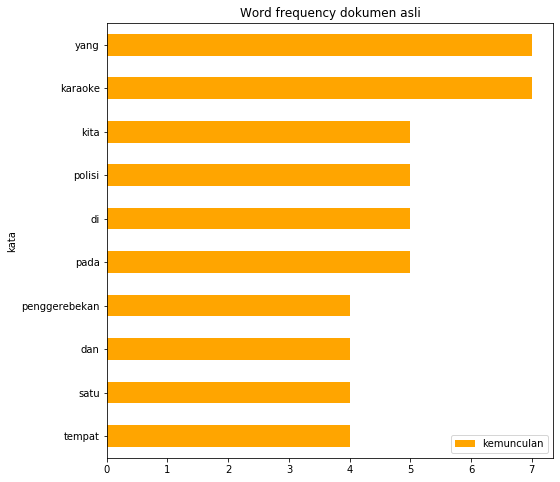

In [46]:
word_frequency = pd.DataFrame(frequency.most_common(10),
                             columns=['kata', 'kemunculan'])

#clean_tweets_no_urls.head()

#Grafix_sebelum_diringkas
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_frequency.sort_values(by='kemunculan').plot.barh(x='kata',
                      y='kemunculan',
                      ax=ax,
                      color="orange")

ax.set_title("Word frequency dokumen asli")

plt.show()

In [47]:
#text_string

a=ringkasan.split()
all_words_no_urls = list(itertools.chain(a))
counts_no_urls = collections.Counter(all_words_no_urls)
#print(counts_no_urls)
counts_no_urls.most_common()
a=counts_no_urls.values()
#print(sum(a))

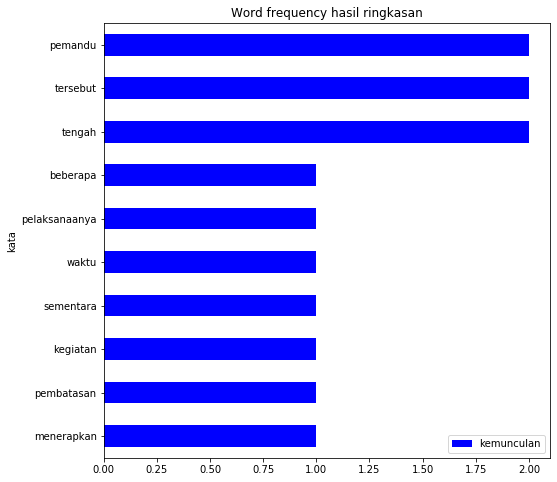

In [48]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(10),
                             columns=['kata', 'kemunculan'])

#clean_tweets_no_urls.head()
#Grafik hasil ringkasan
fig, ax = plt.subplots(figsize=(8, 8))

clean_tweets_no_urls.sort_values(by='kemunculan').plot.barh(x='kata',
                      y='kemunculan',
                      ax=ax,
                      color="blue")

ax.set_title("Word frequency hasil ringkasan")

plt.show()

In [49]:
import re
import string
frequency = {}
#document_text = open('/home/kiki/Code/python/marketingstrategies/new_text.txt')
text_string = casefolding
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
#print(match_pattern) 

for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    #print(frequency[word])
     
#frequency_list = frequency.keys()

#for words in frequency_list:
 #   print (words, frequency[words])

### [2] Word Frequency (setelah proses/ringkasan)

In [50]:
import re
import string
frequency = {}
#document_text = open('/home/kiki/Code/python/marketingstrategies/new_text.txt')
text_string = ringkasan
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
 
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
#frequency_list = frequency.keys()
#for words in frequency_list:
#    print (words, frequency[words])

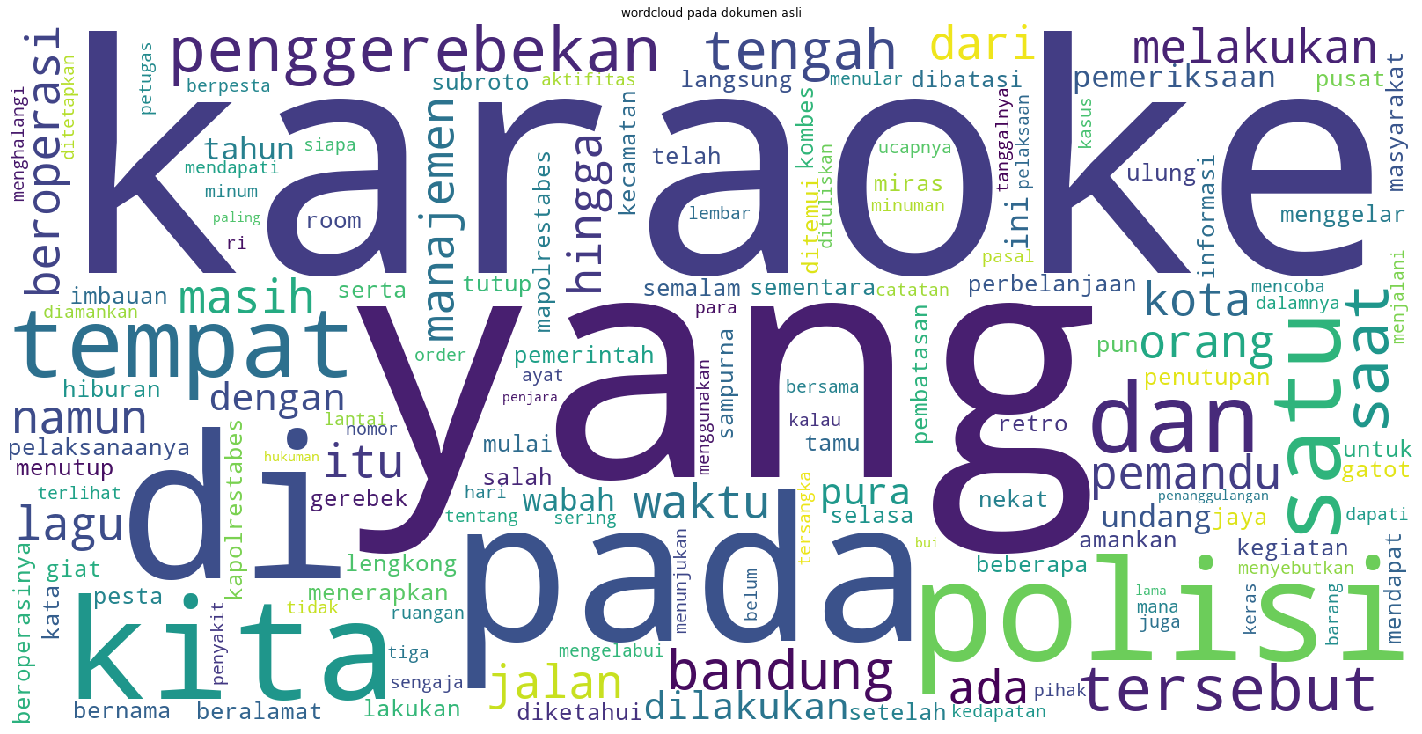

In [51]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = casefolding

wordcloud = WordCloud(background_color='white', mode="RGB", width=1600, height=800).generate(data)


#open a plot of the generated image

plt.figure(figsize=(20,10))
plt.title('wordcloud pada dokumen asli')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [52]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

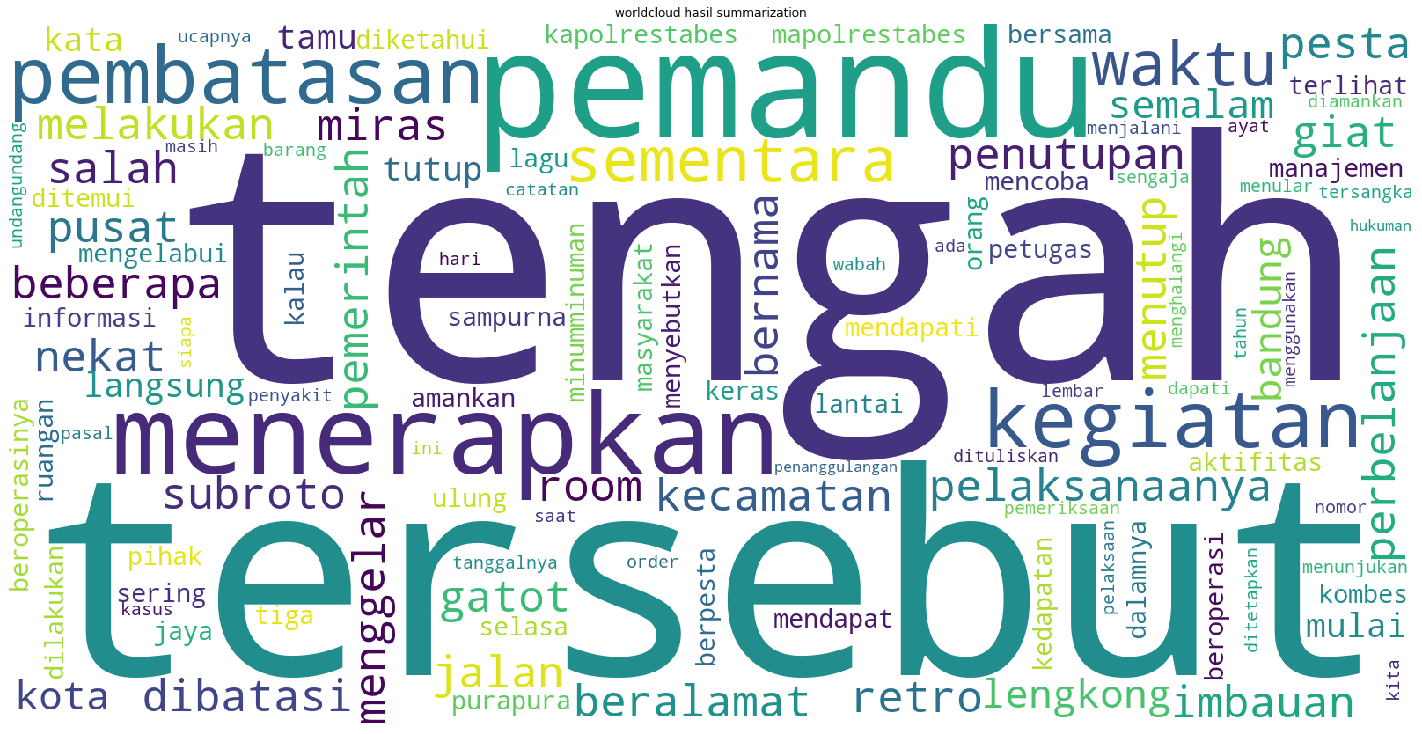

In [53]:
data = ringkasan

wordcloud = WordCloud(background_color='white', mode="RGB", width=1600, height=800).generate(data)


plt.figure(figsize=(20,10))
plt.title('worldcloud hasil summarization')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()